In [ ]:
#%%

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#%%

df= pd.read_csv('main\dataset\global_terrorism.csv',encoding='ISO-8859-1')
df.head(5)

<ipython-input-3-4e50e128d44b>:2: DtypeWarning: Columns (4,6,19,20,25,26,30,31,32,33,34,36,40,42,44,48,50,52,56,61,62,63,65,66,67,68,74,75,76,77,78,79,80,81,83,85,87,89,90,91,92,93,94,96,99,100,101,102,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,131,132,133,135,136,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('main\dataset\global_terrorism.csv',encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#%%

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type'
                    },inplace=True)

In [ ]:
#%%

df.isnull().sum()

eventid              0
Year                 0
Month                0
Day                  0
approxdate      172452
                 ...  
Unnamed: 135    180777
Unnamed: 136    181512
Unnamed: 137    181672
Unnamed: 138    181688
Unnamed: 139    181690
Length: 140, dtype: int64

In [ ]:
#%%

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 140 entries, eventid to Unnamed: 139
dtypes: float64(15), int64(11), object(114)
memory usage: 194.1+ MB


In [ ]:
#%%

df = df[['eventid','Year','Month','Day','latitude','longitude','AttackType','Killed','Wounded','Group','Target_type','Weapon_type','success']]

In [ ]:
#%%

df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
latitude        4556
longitude       4557
AttackType         0
Killed         10234
Wounded        18992
Group            445
Target_type       23
Weapon_type       72
success           16
dtype: int64

In [ ]:
#%%

for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   latitude     177135 non-null  float64
 5   longitude    177134 non-null  float64
 6   AttackType   278 non-null     float64
 7   Killed       167772 non-null  float64
 8   Wounded      162694 non-null  float64
 9   Group        2 non-null       float64
 10  Target_type  255 non-null     float64
 11  Weapon_type  544 non-null     float64
 12  success      181668 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 18.0 MB


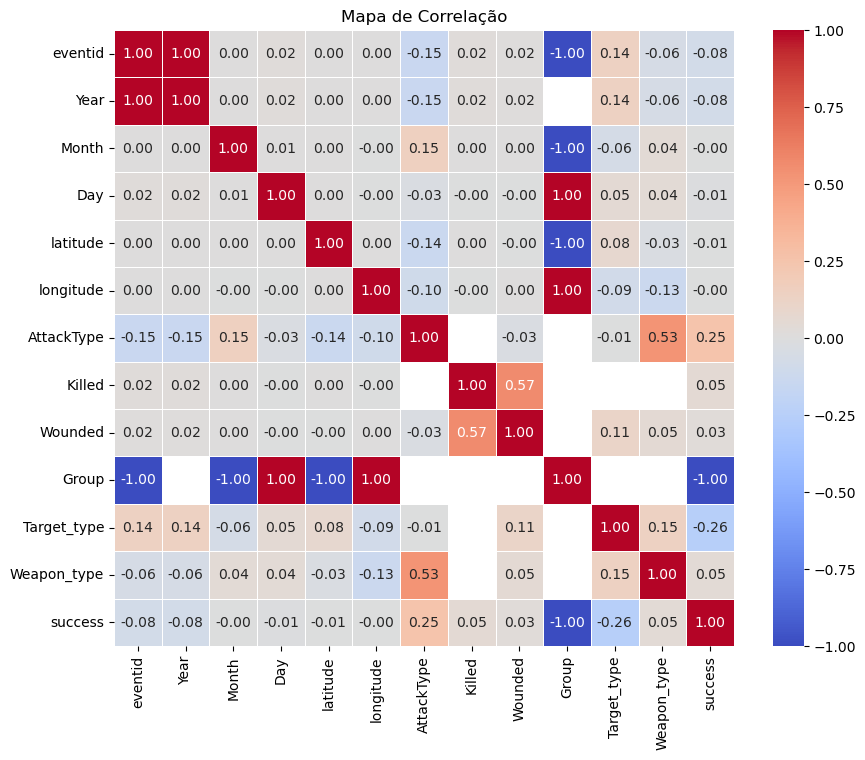

In [ ]:
#%%

# Calcular a matriz de correlação
correlacao = df.corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adicionar título
plt.title('Mapa de Correlação')
plt.show()